[122, 94] [108, 76] [347, 144]
Ad. 1.
Przeżyło:
 18.89% mężczyzn
 74.20% kobiet
łącznie: 38.38%

Ad. 2.
{'survive': 342, 'dead': 549}

Ad. 3.
Średni wiek:
 30.85 mężczyzn
 28.15 kobiet
łącznie: 29.85

Ad. 4.


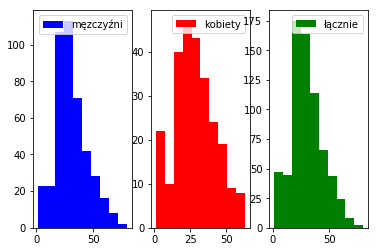

Ad. 5.
Najczestsze nazwiska:
Mężczyźni:
[['Panula' '5']
 ['Sage' '4']
 ['Goodwin' '4']
 ['Gustafsson' '4']
 ['Rice' '4']
 ['Williams' '4']
 ['Johnson' '4']]
Kobiety:
[['Andersson' '6']
 ['Baclini' '4']
 ['Lefebre' '3']
 ['Skoog' '3']
 ['Ford' '3']
 ['Kelly' '3']
 ['Palsson' '3']
 ['Carter' '3']
 ['Brown' '3']
 ['Sage' '3']]
Ad. 6.


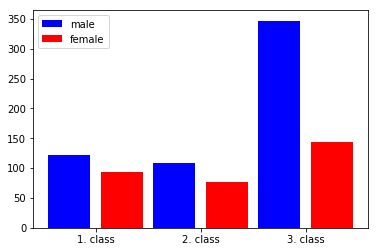

In [98]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

with open('titanic.csv') as infile:
    data = list(csv.reader(infile))

legend = data[0]
data = data[1:]


male = 0
female = 0

alive_male = 0
alive_female = 0

age_male = []
age_female = []

for line in data:
    if line[4] == 'male':
        male += 1
        try:
            age_male.append(int(line[5]))
        except ValueError:
            pass            
        if line[1] == '1':
            alive_male += 1
    else:
        female += 1
        try:
            age_female.append(int(line[5]))
        except ValueError:
            pass

        if line[1] == '1':
            alive_female += 1
            
alive = [alive_male/male, alive_female/female, (alive_male+alive_female)/(male+female)]


def survivors(data):
    """calculates number of survived and dead people
    Params:
        data (list of lists) : data in proper format
    Returns:
        dict
    """
    result = {'survive':0, 'dead':0}
    for line in data:
        if line[1] == '1':
            result['survive'] += 1
        else:
            result['dead'] += 1
    return result
        
freqnames_male = {}
freqnames_female = {}


for line in data:
    name = line[3].split(',')[0]
    if line[4] == 'male':
        if name in freqnames_male.keys():
            freqnames_male[name] += 1
        else:
            freqnames_male[name] = 1
    else: 
        if name in freqnames_female.keys():
            freqnames_female[name] += 1
        else:
            freqnames_female[name] = 1
    
sortedfreqnames_male = []
sortedfreqnames_female = []

for key, value in freqnames_male.items():
    sortedfreqnames_male.append([key, value])
for key, value in freqnames_female.items():
    sortedfreqnames_female.append([key, value])    
    
    
male_freq = np.array(sortedfreqnames_male)[np.argsort(np.array(sortedfreqnames_male)[:,1])][-7:,:]
female_freq = np.array(sortedfreqnames_female)[np.argsort(np.array(sortedfreqnames_female)[:,1])][-10:,:]
    
    
first = [0,0]
second = [0,0]
third = [0,0]
    

    
for line in data:
#     print(line)
    if int(line[2]) == 1:
        if line[4] == 'male':
            first[0] += 1
        else:
            first[1] += 1
    elif int(line[2]) == 2:
        if line[4] == 'male':
            second[0] += 1
        else:
            second[1] += 1
    elif int(line[2]) == 3:
        if line[4] == 'male':
            third[0] += 1
        else:
            third[1] += 1

    
print(first, second, third)
    
print('Ad. 1.')
print('Przeżyło:\n {:.2%} mężczyzn\n {:.2%} kobiet\nłącznie: {:.2%}\n'.format(*alive))

print('Ad. 2.')
print(survivors(data))


print('\nAd. 3.')

mean_age = [np.mean(age_male), np.mean(age_female), np.mean(age_male+age_female)]
print('Średni wiek:\n {:.2f} mężczyzn\n {:.2f} kobiet\nłącznie: {:.2f}\n'.format(*mean_age))

print('Ad. 4.')

fig = plt.figure()
plt.subplot(131)
plt.hist(age_male, color='b', label='męzczyźni')
plt.legend()
plt.subplot(132)
plt.hist(age_female, color='r', label='kobiety')
plt.legend()
plt.subplot(133)
plt.hist(age_male+age_female, color='g', label='łącznie')
plt.legend()
plt.show()

print('Ad. 5.')
print('Najczestsze nazwiska:')
print('Mężczyźni:')
print(male_freq[::-1])
print('Kobiety:')
print(female_freq[::-1])

print('Ad. 6.')
fig, ax = plt.subplots()
ax.bar([1,3,5], [first[0], second[0], third[0]], color='blue')
ax.bar([2,4,6], [first[1], second[1], third[1]], color='red')
ax.set_xticks([1.5,3.5,5.5])
ax.set_xticklabels(['1. class', '2. class', '3. class'])
ax.legend(['male', 'female'])
plt.show()